In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
gesture = 7
fulldata = pd.DataFrame(columns = ['aX','aY','aZ','gX','gY','gZ'])
for i in range(1,2):
    filepath = 'hand/hand_{0}_{1}.csv'.format(gesture, i)
    data = pd.read_csv(filepath, index_col=False)
    fulldata = fulldata.append(data)

In [47]:
import pywt
def wavelet(data, level, wavelet):
    (cA, cD) = pywt.dwt(data, wavelet=wavelet)
    for i in range(1, level):
        (cA, cD) = pywt.dwt(cA, wavelet=wavelet)
    return cA, cD

In [98]:
cA, cD = wavelet(fulldata.iloc[0:,0], 5, 'sym20')
len(cA)

48

In [132]:
for wave in pywt.wavelist(kind = 'discrete'):
    cA, cD = wavelet(fulldata.iloc[0:, 0], 3, wave)
    print(wave, len(cA))
    #plt.plot(cA)
    #plt.show()

bior1.1 44
bior1.3 48
bior1.5 51
bior2.2 48
bior2.4 51
bior2.6 55
bior2.8 58
bior3.1 46
bior3.3 49
bior3.5 53
bior3.7 56
bior3.9 60
bior4.4 51
bior5.5 53
bior6.8 58
coif1 48
coif2 53
coif3 58
coif4 63
coif5 69
coif6 74
coif7 79
coif8 84
coif9 90
coif10 95
coif11 100
coif12 105
coif13 111
coif14 116
coif15 121
coif16 126
coif17 132
db1 44
db2 46
db3 48
db4 49
db5 51
db6 53
db7 55
db8 56
db9 58
db10 60
db11 62
db12 63
db13 65
db14 67
db15 69
db16 70
db17 72
db18 74
db19 76
db20 77
db21 79
db22 81
db23 83
db24 84
db25 86
db26 88
db27 90
db28 91
db29 93
db30 95
db31 97
db32 98
db33 100
db34 102
db35 104
db36 105
db37 107
db38 109
dmey 97
haar 44
rbio1.1 44
rbio1.3 48
rbio1.5 51
rbio2.2 48
rbio2.4 51
rbio2.6 55
rbio2.8 58
rbio3.1 46
rbio3.3 49
rbio3.5 53
rbio3.7 56
rbio3.9 60
rbio4.4 51
rbio5.5 53
rbio6.8 58
sym2 46
sym3 48
sym4 49
sym5 51
sym6 53
sym7 55
sym8 56
sym9 58
sym10 60
sym11 62
sym12 63
sym13 65
sym14 67
sym15 69
sym16 70
sym17 72
sym18 74
sym19 76
sym20 77


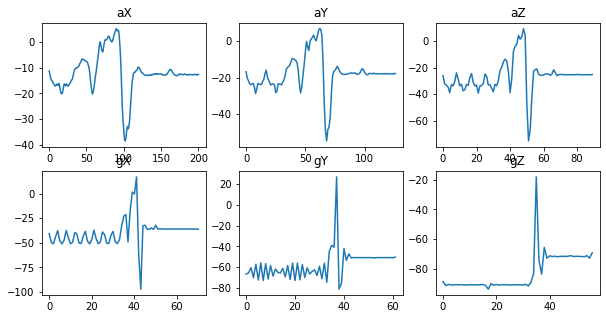

In [130]:
wave = 'coif9'
fig, axs = plt.subplots(2,3, figsize = [10,5])
for i in range(0,1):
    axs[0,0].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],1, wave)[0])
    axs[0,0].set_title('aX')
    axs[0,1].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],2, wave)[0])
    axs[0,1].set_title('aY')
    axs[0,2].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],3, wave)[0])
    axs[0,2].set_title('aZ')
    axs[1,0].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],4, wave)[0])
    axs[1,0].set_title('gX')
    axs[1,1].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],5, wave)[0])
    axs[1,1].set_title('gY')
    axs[1,2].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],6, wave)[0])
    axs[1,2].set_title('gZ')
#plt.savefig('waveletDet_{0}.jpg'.format(gesture))

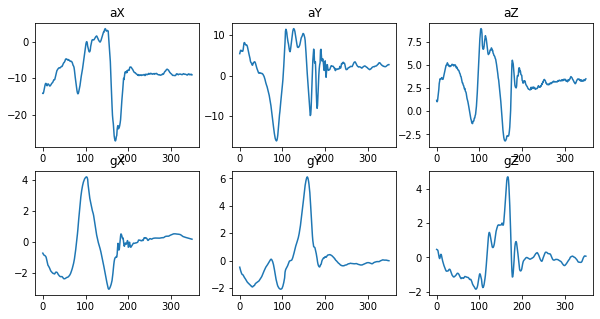

In [120]:
fig, axs = plt.subplots(2,3, figsize = [10,5])
for i in range(0,1):
    axs[0,0].plot(fulldata.iloc[i*350:(i+1)*350,0])
    axs[0,0].set_title('aX')
    axs[0,1].plot(fulldata.iloc[i*350:(i+1)*350,1])
    axs[0,1].set_title('aY')
    axs[0,2].plot(fulldata.iloc[i*350:(i+1)*350,2])
    axs[0,2].set_title('aZ')
    axs[1,0].plot(fulldata.iloc[i*350:(i+1)*350,3])
    axs[1,0].set_title('gX')
    axs[1,1].plot(fulldata.iloc[i*350:(i+1)*350,4])
    axs[1,1].set_title('gY')
    axs[1,2].plot(fulldata.iloc[i*350:(i+1)*350,5])
    axs[1,2].set_title('gZ')

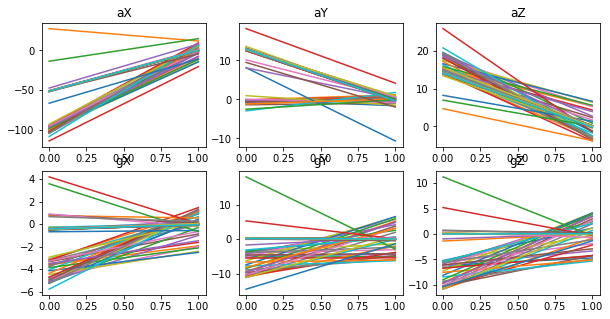

In [57]:
import pywt
fig, axs = plt.subplots(2,3, figsize = [10,5])
for i in range(0,1):
    axs[0,0].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,0],5, 'dmey'))
    axs[0,0].set_title('aX')
    axs[0,1].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,1],5, 'dmey'))
    axs[0,1].set_title('aY')
    axs[0,2].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,2],5, 'dmey'))
    axs[0,2].set_title('aZ')
    axs[1,0].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,3],5, 'dmey'))
    axs[1,0].set_title('gX')
    axs[1,1].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,4],5, 'dmey'))
    axs[1,1].set_title('gY')
    axs[1,2].plot(wavelet(fulldata.iloc[i*350:(i+1)*350,5],5, 'dmey'))
    axs[1,2].set_title('gZ')
#plt.savefig('waveletDet_{0}.jpg'.format(gesture))

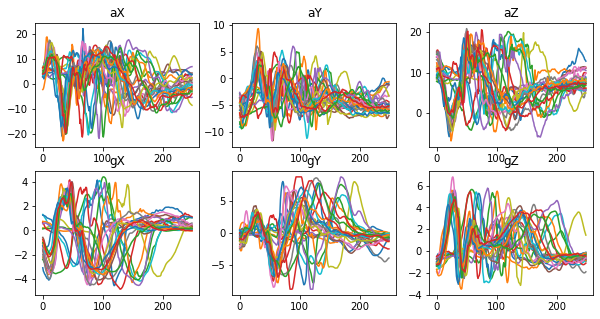

In [231]:
fig, axs = plt.subplots(2,3, figsize = [10,5])
for i in range(1,25):
    axs[0,0].plot(fulldata.iloc[i*250:(i+1)*250,0])
    axs[0,0].set_title('aX')
    axs[0,1].plot(fulldata.iloc[i*250:(i+1)*250,1])
    axs[0,1].set_title('aY')
    axs[0,2].plot(fulldata.iloc[i*250:(i+1)*250,2])
    axs[0,2].set_title('aZ')
    axs[1,0].plot(fulldata.iloc[i*250:(i+1)*250,3])
    axs[1,0].set_title('gX')
    axs[1,1].plot(fulldata.iloc[i*250:(i+1)*250,4])
    axs[1,1].set_title('gY')
    axs[1,2].plot(fulldata.iloc[i*250:(i+1)*250,5])
    axs[1,2].set_title('gZ')


In [38]:
gestures = [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10
]

for gesture in gestures:
    fulldata = pd.DataFrame(columns = ['aX','aY','aZ','gX','gY','gZ'])
    fig, axs = plt.subplots(2,3, figsize = [10,5])
    for i in range(1,51):
        filepath = 'hand/hand_{0}_{1}.csv'.format(gesture, i)
        data = pd.read_csv(filepath, index_col=False)
        fulldata = fulldata.append(data)

        
        axs[0,0].plot(fulldata.iloc[(i-1)*350:i*350,0])
        axs[0,0].set_title('aX')
        axs[0,1].plot(fulldata.iloc[(i-1)*350:i*350,1])
        axs[0,1].set_title('aY')
        axs[0,2].plot(fulldata.iloc[(i-1)*350:i*350,2])
        axs[0,2].set_title('aZ')
        axs[1,0].plot(fulldata.iloc[(i-1)*350:i*350,3])
        axs[1,0].set_title('gX')
        axs[1,1].plot(fulldata.iloc[(i-1)*350:i*350,4])
        axs[1,1].set_title('gY')
        axs[1,2].plot(fulldata.iloc[(i-1)*350:i*350,5])
        axs[1,2].set_title('gZ')
        
    plt.savefig('hand_{0}.jpg'.format(gesture))
    plt.close()